# Sistema generalizado de Lotka-Volterra

##### **¿Cómo medir claramente el impacto de la intensificación?**

### Tasas de reproducción

In [2]:
# Módulos necesarios
import numpy as np
import seaborn
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from copy import deepcopy

In [3]:
np.set_printoptions(precision=3)

In [4]:
%matplotlib inline

Comunidad y funciones necesarias:

In [5]:
condiciones_iniciales = np.loadtxt("osFri-Jan-30-114717-2015-c.txt")
tasas_reproduccion = np.loadtxt("osFri-Jan-30-114717-2015-v.txt")
matriz_interacciones = np.loadtxt("osFri-Jan-30-114717-2015-m.txt")

In [6]:
%run vector_identidades_2.py

In [7]:
def d_lotkavolterra_alea_3(x, t, r_alea, a_alea, manejo): 
    """
    Ecuacion de lotka volterra generalizada que incorpora la intensidad de manejo.
    **De esta forma, la población crece en forma proporcional al manejo.
    """
    dx = x * (manejo * r_alea + np.dot(a_alea, x))
    return dx

In [8]:
def riqueza_sin_espacio(poblacion, t=-1):
    n_especies = poblacion.shape[1]
    return ((sum([i>0.0001 for i in x[t]]))/(n_especies*1.0))*10

Identidades de las especies:

In [9]:
identidades = vector_identidades_2(matriz_interacciones)
print identidades

[ 0.  2.  1.  1.  1.  0.  0.  0.  1.  0.]


Tasas de reproducción:

In [10]:
print tasas_reproduccion

[-0.357 -0.508  1.906  0.637  0.337 -0.293 -0.647 -0.214  1.388 -0.177]


In [11]:
tr2 = deepcopy(tasas_reproduccion)
tr2 = tr2/10
print tasas_reproduccion, tr2

[-0.357 -0.508  1.906  0.637  0.337 -0.293 -0.647 -0.214  1.388 -0.177] [-0.036 -0.051  0.191  0.064  0.034 -0.029 -0.065 -0.021  0.139 -0.018]


In [22]:
tr3 = deepcopy(tasas_reproduccion)
tr3 = tr3 * 10
print tasas_reproduccion, tr3

[-0.357 -0.508  1.906  0.637  0.337 -0.293 -0.647 -0.214  1.388 -0.177] [ -3.57   -5.078  19.061   6.368   3.369  -2.926  -6.469  -2.139  13.882
  -1.775]


### Matriz de interacciones

In [35]:
mi2 = deepcopy(matriz_interacciones)

for i in range(10):
    mi2[i][i] = mi2[i][i] / 10

#print matriz_interacciones[1], mi2[1]

[ 0.147 -0.188  0.699  1.308  0.721  0.609  0.916  0.177  1.502  0.168] [ 0.147 -0.019  0.699  1.308  0.721  0.609  0.916  0.177  1.502  0.168]


Dinámica de poblaciones sin espacio:

In [36]:
t_total = 500
tiempo = np.linspace(0, t_total,t_total+1)

manejo = 1.0 # bosque - como en modelo original
x = odeint(d_lotkavolterra_alea_3, condiciones_iniciales, tiempo, 
           args=(tasas_reproduccion,matriz_interacciones, manejo))

y = odeint(d_lotkavolterra_alea_3, condiciones_iniciales, tiempo, 
           args=(tasas_reproduccion, mi2, manejo))

#z = odeint(d_lotkavolterra_alea_3, condiciones_iniciales, tiempo, 
#           args=(tr3, matriz_interacciones, manejo))

In [37]:
riqueza_x = np.zeros_like(tiempo)
riqueza_y = np.zeros_like(tiempo)
#riqueza_z = np.zeros_like(tiempo)


for t in tiempo.astype(int):
    riqueza_x[t] = riqueza_sin_espacio(x, t)
    riqueza_y[t] = riqueza_sin_espacio(y, t)
    #riqueza_z[t] = riqueza_sin_espacio(z, t)

In [42]:
%matplotlib notebook
fig = plt.figure()
plt.plot(tiempo, riqueza_x, color="green")
plt.plot(tiempo, riqueza_y, color="blue")
#plt.plot(tiempo, riqueza_z, color="red")
plt.ylim(ymax = 10, ymin = 0)
plt.xlim(xmax = 50)
plt.show() 

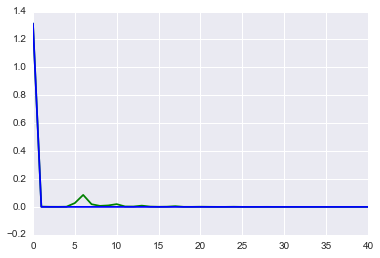

In [39]:
#Graficar la población de una especie
%matplotlib inline
fig = plt.figure()
fig.add_subplot(111)
#plt.plot(tiempo, x[:, [0]], color="red")
plt.plot(tiempo, x[:, [5]], color = "green")
plt.plot(tiempo, y[:, [5]], color = "blue")
#plt.plot(tiempo, z[:, [5]], color = "red")
plt.xlim(xmax = 40)
plt.show() 

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
# (From numericalmooc by Lorena Barba)
from IPython.core.display import HTML
css_file = "C:\Users\hp\Desktop\proyectof\style.css"
HTML(open(css_file, "r").read())